## 練習時間
參考 Day 12 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

In [48]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### 之前做過的處理

In [49]:
# 設定 data_path
dir_data = './data/'
f_app_train = os.path.join(dir_data, 'application_train.csv')
f_app_test = os.path.join(dir_data, 'application_test.csv')

app_train = pd.read_csv(f_app_train)
app_test = pd.read_csv(f_app_test)

from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in app_train:
    if app_train[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(app_train[col].unique())) <= 2:
            # Train on the training data
            le.fit(app_train[col])
            # Transform both training and testing data
            app_train[col] = le.transform(app_train[col])
            app_test[col] = le.transform(app_test[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)

# Create an anomalous flag column
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)
# also apply to testing dataset
app_test['DAYS_EMPLOYED_ANOM'] = app_test["DAYS_EMPLOYED"] == 365243
app_test["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace = True)

# absolute the value of DAYS_BIRTH
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])
app_test['DAYS_BIRTH'] = abs(app_test['DAYS_BIRTH'])

In [50]:
app_train['YEAR_BIRTH'] = app_train['DAYS_BIRTH'] / 365
app_test['YEAR_BIRTH'] = app_test['DAYS_BIRTH'] / 365

In [51]:
app_train['DAYS_EMPLOYED'] = app_train['DAYS_EMPLOYED'] * -1

(30.238, 39.959]    80188
(39.959, 49.679]    74661
(49.679, 59.4]      66194
(20.469, 30.238]    46806
(59.4, 69.121]      39662
Name: equal_width_group, dtype: int64


/home/rex/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0,0.5,'Days Employed')

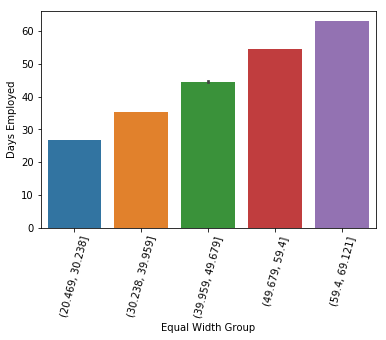

In [52]:
# Equal Width Group
app_train['equal_width_group'] = pd.cut(app_train['YEAR_BIRTH'], 5)
print(app_train['equal_width_group'].value_counts())

sns.barplot(app_train['equal_width_group'], app_train['YEAR_BIRTH'])
plt.xticks(rotation = 75); plt.xlabel('Equal Width Group'); plt.ylabel('Days Employed')

(20.517, 32.038]    61512
(39.496, 47.178]    61509
(32.038, 39.496]    61504
(56.093, 69.121]    61495
(47.178, 56.093]    61491
Name: equal_freq_group, dtype: int64


/home/rex/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0,0.5,'Days Employed')

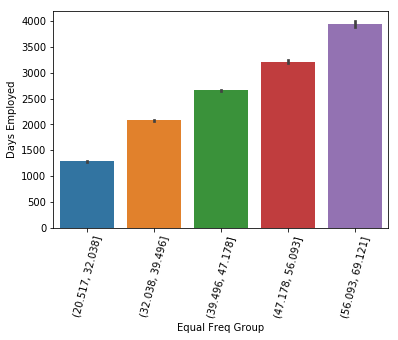

In [53]:
# Equal Freq Group
app_train['equal_freq_group'] = pd.qcut(app_train['YEAR_BIRTH'], 5)
print(app_train['equal_freq_group'].value_counts())

sns.barplot(app_train['equal_freq_group'], app_train['DAYS_EMPLOYED'])
plt.xticks(rotation = 75); plt.xlabel('Equal Freq Group'); plt.ylabel('Days Employed')

(30, 40]    82308
(40, 50]    76541
(50, 60]    68062
(20, 30]    45021
(60, 70]    35579
(80, 90]        0
(70, 80]        0
(10, 20]        0
Name: customized_group, dtype: int64


/home/rex/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0,0.5,'Days Employed')

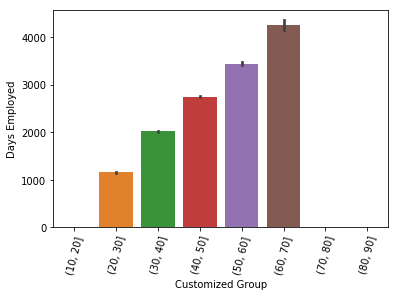

In [54]:
# Customized Group
age_group = [x for x in range(10,100,10)]
app_train['customized_group'] = pd.cut(app_train['YEAR_BIRTH'], age_group)
print(app_train['customized_group'].value_counts())

sns.barplot(app_train['customized_group'], app_train['DAYS_EMPLOYED'])
plt.xticks(rotation = 75); plt.xlabel('Customized Group'); plt.ylabel('Days Employed')